# Apa itu Neural Network?

Otak manusia tersusun atas miliaran sel yang kita sebut sebagai neuron. Setiap neuron tersebut saling terkoneksi menggunakan sinapsis. Jika jumlah sinapsis yang memadai menyuruh neuron untuk menyala, maka neuron tersebut akan menyala. Proses ini kita sebut sebagai 'berpikir'.

Proses tersebut dapat dimodelkan dengan membentuk neural network pada komputers. Pada neural network menggunakan komputer, kita menggunakan matriks dan operasi matematika untuk meniru cara kerja neural network pada otak. Dibawah ini ditampilkan contoh sebuah neuron dengan 3 input dan 1 output.

<div>
<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*HDWhvFz5t0KAjIAIzjKR1w.png" width="500"/>
</div>

Anggaplah neuron menerima input dengan output seperti tabel dibawah, berapakah nilai yang seharusnya menggantikan '?' pada input baru? bagaimana pola neuron?

<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*nEooKljI8XbKQh4cFbZu1Q.png" width="500"/>
</div>


# Bagaimana cara melatih neural network?

Untuk melatih neural network pada komputer, kita berikan bobot (weight) yang dapat bernilai positif atau negatif kepada setiap input. Mirip dengan korelasi, input yang memiliki nilai positif atau negatif besar akan memiliki pengaruh yang kuat terhadap hasil dari neural network. Nilai awal untuk setiap bobot haruslah disetel sebagai nilai acak, lalu mulai proses pelatihan yang terdiri atas:
1. Ambil input dari dataset, urutkan berdasarkan bobot masing-masing, lalu gunakan terhadap formula untuk mengkalkulasi output dari neural network.
2. Hitung nilai error.
3. Ubah nilai bobot tergantung dengan hasil error.
4. Ulangi hingga error berada pada ambang yang dapat diterima.

## Bagaimana cara menghitung output neuron?

Untuk menghitung output dari neuron, pertama hitung total bobot dari input neuron yang dapat dihitung menggunakan formula berikut:

<div>
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*RV7-CFkmmByfcXKkPcbAYQ.png" width="500"/>
</div>

Kemudian normalisasikan hasilnya sehingga berada diantara 0 atau 1. Untuk melakukan ini kita dapat gunakan fungsi sigmoid.

<div>
<img src="https://miro.medium.com/v2/resize:fit:116/format:webp/1*5il5GLo0gamypklQQ_z0AA.png" width="50"/>
</div>

Akhirnya jika kedua persamaan disatukan, kita akan mendapatkan output dari neuron.

<div>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*7YdyG6fc6f6zMmx3l0ZGsQ.png" width="400"/>
</div>

## Bagaimana cara mendapatkan bobot yang sesuai?

Untuk mendapatkan nilai bobot terbaik, dapat digunakan metode “Error Weighted Derivative” 

<div>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*SQBjpbBcCT3lTQlPEdr1eg.png" width="600"/>
</div>

Dengan menggunakan metode ini, pertama dibuat penyesuaian yang setara dengan ukuran error. Lalu dikalikan dengan input dan terakhir dikalikan dengan gradien dari kurva fungsi sigmoid, atau lebih rincinya:

1. Kurva sigmoid digunakan untuk menghitung output dari neuron.
2. Jika output berupa nilai positif atau negatif besar, berarti neuron cukup dapat diandalkan.
3. Pada angka yang besar, kurva sigmoid memiliki gradien yang datar.
4. Jika neuron cukup dapat diandalkan, maka bobot tidak perlu disesuaikan terlalu besar. Perkalian menggunakan gradien kurva sigmoid merupakan jawaban untuk melakukan hal tersebut.

Gradien dari kurva sigmoid sendiri dapat dicari melalui:

<div>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*HdHm9u3_wjwBPmwuLg3D3g.png" width="500"/>
</div>

Menggabungkan 2 persamaan diatas akan mendapatkan:

<div>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Jow4WVWNOp6rtiJ7vNQ0gQ.png" width="500"/>
</div>

# Membuat neural network menggunakan Python

In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from numpy import exp, array, random, dot
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## using keras library

In [3]:
# Read dataset

df = pd.read_csv("adult.csv")
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
# Preprocessing

col_names = df.columns

for c in col_names:
	df[c] = df[c].replace("?", np.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [6]:
df.replace(
    ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
    ['divorced','married','married','married','not married','not married','not married'], 
    inplace = True
)

In [7]:
labelEncoder = preprocessing.LabelEncoder()
category_col = ['race', 'marital-status', 'gender', 'income'] 

for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])

category_col_1 = ['workclass', 'education', 'occupation', 'relationship', 'native-country'] 
df_2           = pd.get_dummies(df, columns = category_col_1, drop_first = True)

dataframe = df_2.drop('fnlwgt', 1)
dataframe = dataframe[[c for c in dataframe if c not in ['income']] + ['income']]
dataframe.head(20)

<ipython-input-7-8393eefc59f3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = df_2.drop('fnlwgt', 1)


,age,educational-num,marital-status,race,gender,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,25,7,2,2,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,1,4,1,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,1,4,1,0,0,40,1,0,...,0,0,0,0,0,0,1,0,0,1
3,44,10,1,2,1,7688,0,40,0,0,...,0,0,0,0,0,0,1,0,0,1
4,18,10,2,4,0,0,0,30,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,6,2,4,1,0,0,30,0,0,...,0,0,0,0,0,0,1,0,0,0
6,29,9,2,2,1,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
7,63,15,1,4,1,3103,0,32,0,0,...,0,0,0,0,0,0,1,0,0,1
8,24,10,2,4,0,0,0,40,0,0,...,0,0,0,0,0,0,1,0,0,0
9,55,4,1,4,1,0,0,10,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
# Split data into train and test

X = dataframe.iloc[:, 0:88].values
y = dataframe.iloc[:, 88].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sc      = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [14]:
# Create a simple neural network

classifier = Sequential()

classifier.add(Dense(6, activation = 'relu', input_dim = 88))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Train the neural network

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
3908/3908 [==============================] - 10s 2ms/step - loss: 0.3673 - accuracy: 0.8313
Epoch 2/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3233 - accuracy: 0.8507
Epoch 3/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.3181 - accuracy: 0.8533
Epoch 4/100
3908/3908 [==============================] - 7s 2ms/step - loss: 0.3160 - accuracy: 0.8550
Epoch 5/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.3145 - accuracy: 0.8540
Epoch 6/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.3132 - accuracy: 0.8550
Epoch 7/100
3908/3908 [==============================] - 9s 2ms/step - loss: 0.3122 - accuracy: 0.8563
Epoch 8/100
3908/3908 [==============================] - 10s 3ms/step - loss: 0.3118 - accuracy: 0.8554
Epoch 9/100
3908/3908 [==============================] - 8s 2ms/step - loss: 0.3111 - accuracy: 0.8570
Epoch 10/100
3908/3908 [==============================] - 8s 2ms/step -


Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7416
           1       0.74      0.59      0.66      2353

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769



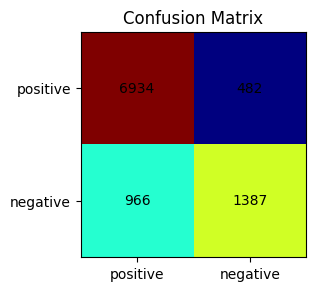

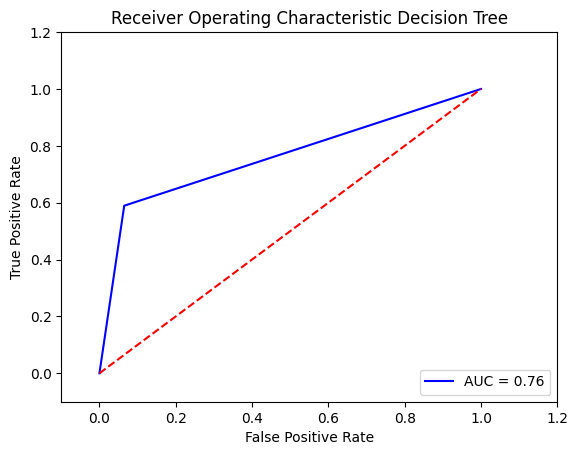

Gini_coefficient from the ROC curve is 
 0.5244656572366706


In [19]:
# Evaluasi

#classification report
print ("\nClassification Report\n")
print (classification_report(y_test, y_pred))

conf_arr  = confusion_matrix(y_test, y_pred)
norm_conf = []

for i in conf_arr:
    a       = 0
    tmp_arr = []
    a       = sum(i, 0)

    for j in i:
        tmp_arr.append(float(j) / float(a))

    norm_conf.append(tmp_arr)

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(1, 2, 1)
ax.set_aspect(1)

res           = ax.imshow(np.array(norm_conf), cmap = plt.cm.jet, interpolation = 'nearest')
width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy = (y, x), horizontalalignment = 'center', verticalalignment = 'center')

## confusion matrix
plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc                                             = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##gini coefficient
Gini_coefficient = 2 * roc_auc - 1
print("Gini_coefficient from the ROC curve is \n", Gini_coefficient)

## From scratch

In [23]:
# buat class neural network

class NeuralNetwork():
    def __init__(self):
        # gunakan seed pada RNG agar angka yang dihasilkan sama setiap kali program dijalankan
        random.seed(1)

        # buat 1 neuron dengan 3 input dan 1 output,
        # kemudian beri bobot acak dengan nilai antara -1 hingga 1 dan mean 0
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # Fungsi sigmoid.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # Fungsi turunan fungsi sigmoid yang merupakan gradien dari kurva sigmoid
    # digunakan untuk menunjukkan seberapa bagus bobot yang dimiliki saat ini
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Fungsi untuk melatih neural network
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Masukan training data ke neural network
            output = self.think(training_set_inputs)

            # Hitung error
            error = training_set_outputs - output

            # Hitung penyesuaian yang diperlukan dari nilai error
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Sesuaikan bobot
            self.synaptic_weights += adjustment

    # Proses berpikir neural networks
    def think(self, inputs):
        # Masukan input kedalam neural network
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

In [24]:
# jalankan neural network

if __name__ == "__main__":
    # buat 1 neural network
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # buat dataset
    training_set_inputs  = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Latih neural network
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print("New synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    # Terakhir coba neural network menggunakan input berbeda
    print("Considering new situation [1, 0, 0] -> ?: ")
    print(neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


# Simulasi

Cari dataset yang berbeda, lalu buat model prediksi neural network dari dataset tersebut dengan menggunakan library keras.

*note: model harus memberi akurasi minimum sebesar 70%, dibawah itu mendapat pengurangan nilai.

*bonus: akurasi model >= 90%